# Naive Bayes Gaussian - Babies,  Teens and Adults 

### Generating some training data

Each indiviudal has two atributes (x0,x1) 
* x0  is heigth and 
* x1  is weight 

There are two clases of individuals
* Babies,
* Teens  and 
* adults
    
We generate  training examples 
* 50 babies ~ Gaussian([60, 30], [[50,15],[15, 30]])
* 70 teens ~ Gaussian([120, 50], [[90,10 ],[10, 40]])
* 120 adults ~ Gaussian([150, 80], [[60, 10],[10, 40]])

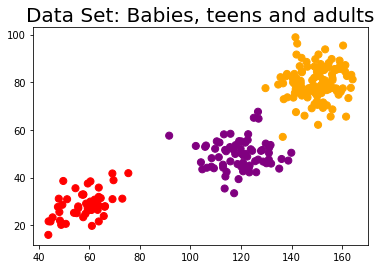

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

#Gerando datos de una multinomial para bebés, adolescentes y adultos.

babies= np.random.multivariate_normal([60, 30], [[50,15], [15, 30]], 50)
teens=np.random.multivariate_normal([120, 50], [[90,10 ], [10, 40]], 70)
adults=np.random.multivariate_normal([150, 80], [[60, 10],[10, 40]], 120)

x=np.concatenate((babies, teens, adults), axis=0)

#Crea arreglos vacios de la longitud que tienen los bebés, adolescentes y adultos.
y1=np.empty(len(babies))
y2=np.empty(len(teens))
y3=np.empty(len(adults))

#Asigna 0, 1 Y 2 respectivamente a los bebés, adolescentes y adultos. 
y1.fill(0)
y2.fill(1)
y3.fill(2)

#Crea el arreglo que asigna 0 a 50 valores que corresponden a los bebés, 
#1 a 70 valores que corresponden a los adolescentes y 2 a 120 valores que corresponden a los adultos.

y=np.concatenate((y1,y2,y3), axis=0)


#Graficando los datos 
color= ['red' if i == 0  else 'purple' if i==1 else 'orange' for i in y]
plt.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50)
plt.title('Data Set: Babies, teens and adults', size=20);



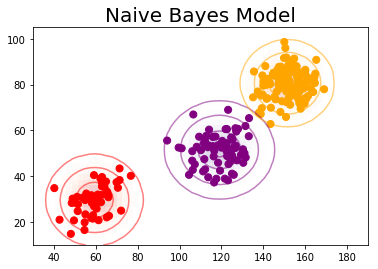

In [2]:
fig, ax = plt.subplots()
color= ['red' if i == 0 else 'purple' if i==1 else 'orange' for i in y]
ax.scatter(x[:,0], x[:,1],  c=color, s=50);
ax.set_title('Naive Bayes Model', size=20)
xlim = (30, 190)
ylim = (10, 105)

#Genra el intervalo de los ejes con el número de intervalos 
xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)

xx, yy = np.meshgrid(xg, yg)


Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red','purple', 'orange']):
    mask = (y == label)
    
#GENERAMOS MIU Y SIGMA PARA LA DISTRIBUCIÓN
    mu, std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    
    
    Pm = np.ma.masked_array(P, P < 0.03)
     
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.2,
                  cmap=color.title() + 's')
#Contornos de los circulos 
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.5)
    
ax.set(xlim=xlim, ylim=ylim);



In [9]:
#MODELO GAUSSIANO
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x, y);

### The desicion boundary in Gaussian naive Bayes is quadratic.

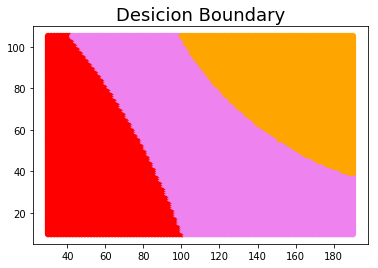

In [10]:
#Nuevos ejes 
x0 =np.linspace(30,190,101)
x1 =np.linspace(10,105,101)
#Enmallado
g = np.meshgrid(x0,x1)
xmesh = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)
#función predictora 
ymesh= model.predict(xmesh)



colormesh= ['red' if i == 0 else 'violet' if i==1 else 'orange' for i in ymesh]
plt.scatter(xmesh[:, 0], xmesh[:, 1], c=colormesh )
plt.title('Desicion Boundary', size=18);

### Testing the model with some random data

In [31]:
rng = np.random.RandomState(0)
xnew = [30, 10] + [100, 100] * rng.rand(500, 2) 
ynew = model.predict(xnew)

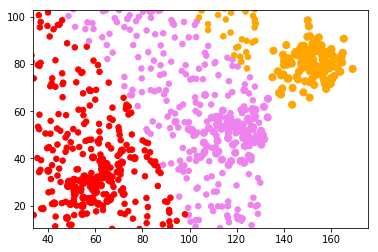

In [32]:
color= ['red' if i == 0 else 'violet' if i == 1 else 'orange' for i in y]
plt.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50);
lim = plt.axis()

colornew= ['red' if i == 0 else 'violet' if i ==1 else 'orange' for i in ynew]
plt.scatter(xnew[:,0], xnew[:,1], c=colornew, s=30,  alpha=1)
plt.axis(lim);

### Pobabilistic classification - posterior probabilities for the classes

In [35]:
xnew[-20:].round(2)

array([[ 52.01,  72.29],
       [ 41.15,  55.9 ],
       [ 62.23,  41.65],
       [ 78.26,  82.98],
       [ 36.92,  97.92],
       [103.48,  27.65],
       [123.92,  60.63],
       [129.98,  29.73],
       [ 83.49,  39.02],
       [ 60.42,  69.11],
       [122.17,  90.53],
       [102.39,  65.92],
       [122.23,  59.24],
       [117.38,  93.4 ],
       [ 51.38,  87.12],
       [ 31.22,  42.28],
       [ 52.96,  60.69],
       [103.69,  19.77],
       [ 81.49, 103.84],
       [ 52.86,  77.71]])

In [37]:
yprob = model.predict_proba(xnew[-20:])
yprob.round(2)

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.98, 0.02, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ]])

## References

1. Naive Bayes 3: Gaussian example  Victor Lavrenko  https://www.youtube.com/watch?v=r1in0YNetG8&list=PLBv09BD7ez_7-4V3IJIzCHWQj9nd4rVWB&index=3
2. In Depth: Naive Bayes Classification https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Gaussian-Naive-Bayes
3. 6 Easy Steps to Learn Naive Bayes Algorithm (with codes in Python and R)
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
 
